In [1]:
import sys
sys.path.append('/users/mibianco/codes/pyC2Ray/pyc2ray/pyc2ray')
from utils.other_utils import get_same_values_in_array, get_redshifts_from_output
import numpy as np, tools21cm as t2c, h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, CenteredNorm, TwoSlopeNorm

In [3]:
path_input = '/store/ska/sk015/244Mpc_RT/244Mpc_f2_0_250/'
path_results = '/scratch/snx3000/mibianco/results_c2ray/results_pyc2ray/'
#path_results = '/scratch/snx3000/mibianco/results_c2ray/results_pyc2ray_test2/'
#path_results = '/scratch/snx3000/mibianco/results_c2ray/results_pyc2ray_positionerror/'

redshift_density = np.loadtxt(path_input+'coarser_densities/redshift_density.txt')
redshift_sources = np.loadtxt(path_input+'sources_hdf5/redshift_sources.txt')
redshift_result = np.sort(get_redshifts_from_output(path_results))[::-1]

In [57]:
# get common redshift between inputs and outputs
redshift_ds = get_same_values_in_array(redshift_density, redshift_sources)
redshift_result = np.sort(get_redshifts_from_output(path_results))[::-1]
redshift = get_same_values_in_array(redshift_result, redshift_ds)

# select just a few redshift for the plot
redshift = redshift[-2:] #np.array([9.938, 9.611])
print(redshift)

[14.699 14.294]


In [58]:
source_file = '/scratch/snx3000/mibianco/results_c2ray/convert_sources/%.3f-coarsest_wsubgrid_sources.hdf5'

fnames = [path_input+'coarser_densities/%.3fn_all.dat', 
          path_results+'IonRates_%.3f.dat', 
          path_results+'xfrac_%.3f.dat',
          source_file]
          #path_results+'xfrac3d_%.3f.bin']

titles = [r'$n_{\rm IGM}$ [cm$^{-3}$]', r'$\Gamma_{\rm HI}$ [s$^{-1}$]', r'$x_{\rm HII}$', r'$M_{\rm halo}$ [$M_{\odot}$]']
#norms = [LogNorm(vmin=8e-8, vmax=1e-6), LogNorm(vmin=1e-17), None]
#norms = [None, LogNorm(vmin=1e-18, vmax=1e-12), CenteredNorm(vcenter=0.5, halfrange=0.5)]
norms = [None, 'log', None, None]
#norms = [None, None, None, None]


#zoom = [210, 220, 170, 180]
zoom = [220, 230, 60, 70]
#zoom = [200, 250, 150, 200]
#zoom = [160, 190, 140, 170]

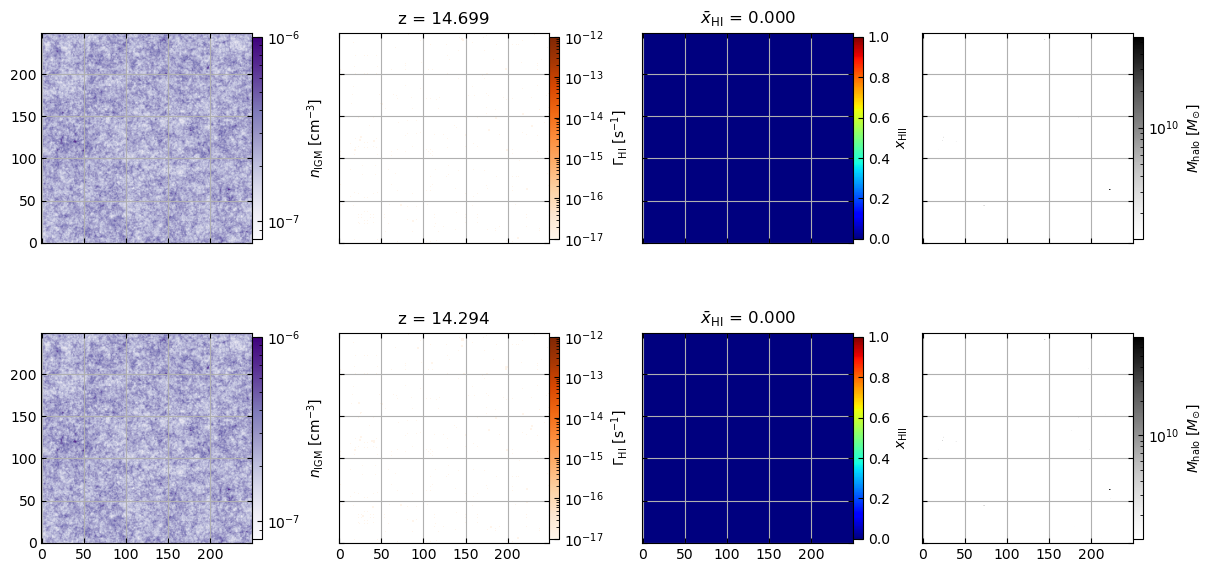

(None, None)

<Figure size 640x480 with 0 Axes>

In [59]:
i_plot = 124
#i_plot = 1

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

fig, axs = plt.subplots(redshift.size, 4, figsize=(12, 3*redshift.size), constrained_layout=True)
fig.subplots_adjust(hspace=2, wspace=0.4)

#fig.suptitle('244Mpc_250')
for i, z in enumerate(redshift):
    axs[i,1].set_title('z = %.3f' %z)
    for j, fn in enumerate(fnames):
        #c, n = colors[j], norms[j]
        if('IonRates' in fn):
            data = t2c.read_cbin(fn %z, bits=32, order='F')
            im = axs[i,j].imshow(data[i_plot], cmap='Oranges', norm=LogNorm(vmin=1e-17, vmax=1e-12), origin='lower')
        elif('n_all' in fn):
            data = t2c.DensityFile(fn %z).cgs_density / t2c.m_p
            im = axs[i,j].imshow(data[i_plot], cmap='Purples', norm=LogNorm(vmin=8e-8, vmax=1e-6), origin='lower')
        elif('xfrac' in fn):
            data = t2c.read_cbin(fn %z, bits=64, order='F')
            axs[i,2].set_title(r'$\bar{x}_{\rm HI}$ = %.3f' %np.mean(data))
            im = axs[i,j].imshow(data[i_plot], cmap='jet', vmin=0, vmax=1, origin='lower')
        elif('sources' in fn):
            f = h5py.File(source_file %z)
            sources = f['sources_positions'][:].astype(int)
            mass = f['sources_mass'][:]
            f.close()
            data = np.zeros((250,250,250))
            data[sources[:,0]-1, sources[:,1]-1, sources[:,2]-1] = mass
            im = axs[i,j].imshow(data[i_plot], cmap='Greys', norm=LogNorm(), origin='lower')
            
        plt.colorbar(im, ax=axs[i,j], label=titles[j], pad=0.0, fraction=0.048)
        #axs[i,j].set_xlim(zoom[:2]), axs[i,j].set_ylim(zoom[2:])
        
        axs[i,j].label_outer()
        #axs[i,j].axes.get_yaxis().set_visible(False)
        #axs[i,j].axes.get_xaxis().set_visible(False)
        axs[i,j].grid()

#plt.savefig('244Mpc_250_slices.png', bbox_inches='tight')
plt.show(), plt.clf()

old: 1.1519303475503173e-09 1.4546411810833761e-05 0.9980970822867837
new: 1.1523866231925861e-09 9.520750731025334e-09 0.02477801131156851

old: 1.208966816414192e-09 2.6917982249579372e-05 0.9991184714844227
new: 1.2094736371280612e-09 1.2988051807526219e-08 0.02473157763674637



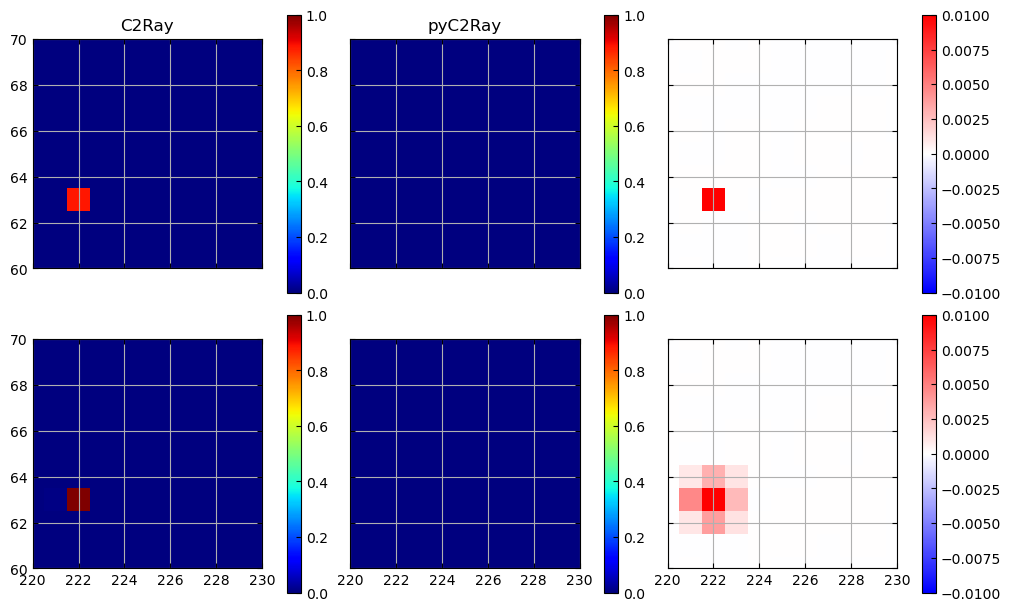

In [60]:
path_new = '/scratch/snx3000/mibianco/results_c2ray/results_pyc2ray/'
path_old = '/store/ska/sk015/244Mpc_RT/244Mpc_f2_0_250/results/'

fig, axs = plt.subplots(redshift.size, 3, figsize=(10, 3*redshift.size), constrained_layout=True)
fig.subplots_adjust(hspace=2, wspace=0.4)
axs[0,0].set_title('C2Ray'), axs[0,1].set_title('pyC2Ray')

for i, z in enumerate(redshift):
    xHI_old = t2c.XfracFile('%sxfrac3d_%.3f.bin' %(path_old, z)).xi
    #xHI_old = t2c.IonRateFile('%sIonRates3_%.3f.bin' %(path_old, z)).irate
    xHI_new = t2c.read_cbin('%sxfrac_%.3f.dat' %(path_new, z), bits=64, order='F')
    #xHI_new = t2c.read_cbin('%sIonRates_%.3f.dat' %(path_new, z), bits=32, order='F')
    
    im = axs[i,0].imshow(xHI_old[i_plot], vmin=0, vmax=1, cmap='jet', origin='lower')
    #im = axs[i,0].imshow(xHI_old[i_plot], vmax=1e-12, cmap='hot', origin='lower')
    plt.colorbar(im, ax=axs[i,0])
    im = axs[i,1].imshow(xHI_new[i_plot], vmin=0, vmax=1, cmap='jet', origin='lower')
    #im = axs[i,1].imshow(xHI_new[i_plot], vmax=1e-12, cmap='hot', origin='lower')
    plt.colorbar(im, ax=axs[i,1])
    
    diff = xHI_old[i_plot]-xHI_new[i_plot]
    im = axs[i,2].imshow(diff, norm=CenteredNorm(vcenter=0, halfrange=0.01), cmap='bwr', origin='lower')
    plt.colorbar(im, ax=axs[i,2])

    print('old:', xHI_old.min(), xHI_old.mean(), xHI_old.max())
    print('new:', xHI_new.min(), xHI_new.mean(), xHI_new.max())
    print()
    for j in range(3):
        axs[i,j].grid()
        axs[i,j].label_outer()
        axs[i,j].set_xlim(zoom[:2]), axs[i,j].set_ylim(zoom[2:])
        #axs[i,j].set_xlim(160, 190), axs[i, j].set_ylim(140, 170)
        #axs[i,j].set_xlim(150, 160), axs[i, j].set_ylim(150, 160)
        #axs[i,j].set_xlim(199, 249), axs[i, j].set_ylim(150, 200)

-2.0455635404070457e-07 1.4536891060102717e-05 0.9977989146686693


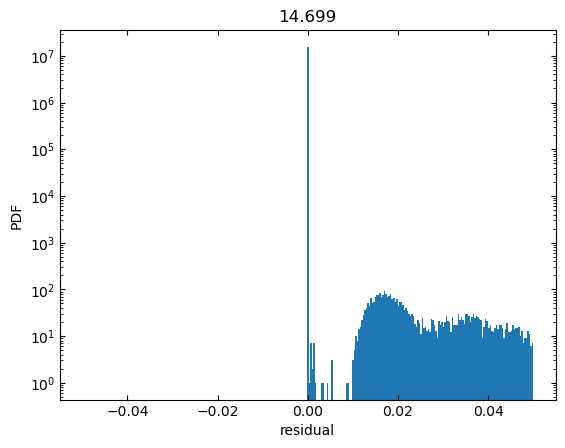

-2.891939318194932e-07 2.69049941977718e-05 0.9987156668972221


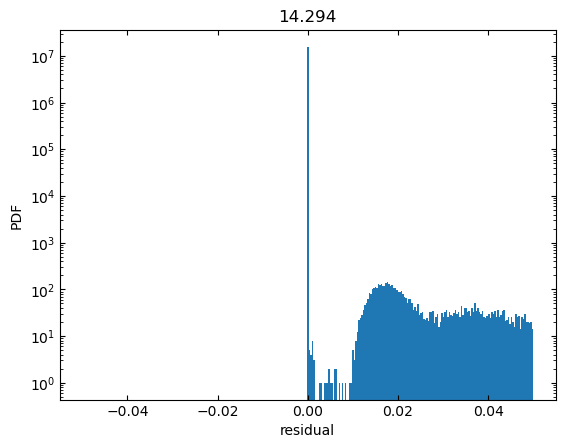

<Figure size 640x480 with 0 Axes>

In [61]:
for i, z in enumerate(redshift):
    #xHI_old = t2c.IonRateFile('%sIonRates3_%.3f.bin' %(path_old, z)).irate
    #xHI_new = t2c.read_cbin('%sIonRates_%.3f.dat' %(path_new, z), bits=32, order='F')
    #xbin = np.linspace(-5e-17, 5e-13, 300)

    xHI_old = t2c.XfracFile('%sxfrac3d_%.3f.bin' %(path_old, z)).xi
    xHI_new = t2c.read_cbin('%sxfrac_%.3f.dat' %(path_new, z), bits=64, order='F')
    xbin = np.linspace(-5e-2, 5e-2, 300)
    
    diff = xHI_old-xHI_new
    print(diff.min(), diff.mean(), diff.max())
    
    # plot difference
    plt.title(z)
    plt.hist(diff.flatten(), bins=xbin)
    plt.yscale('log')
    plt.ylabel('PDF'), plt.xlabel('residual')
    plt.show(), plt.clf()

Program runtime: 0.006578 minutes.
The output is a tuple containing output-map and volume-list array respectively.
Program runtime: 0.006427 minutes.
The output is a tuple containing output-map and volume-list array respectively.
The output is Size, Size**2 dP/d(Size), lowest value
The output is Size, Size**2 dP/d(Size), lowest value


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Program runtime: 0.006315 minutes.
The output is a tuple containing output-map and volume-list array respectively.
Program runtime: 0.006332 minutes.
The output is a tuple containing output-map and volume-list array respectively.
The output is Size, Size**2 dP/d(Size), lowest value
The output is Size, Size**2 dP/d(Size), lowest value


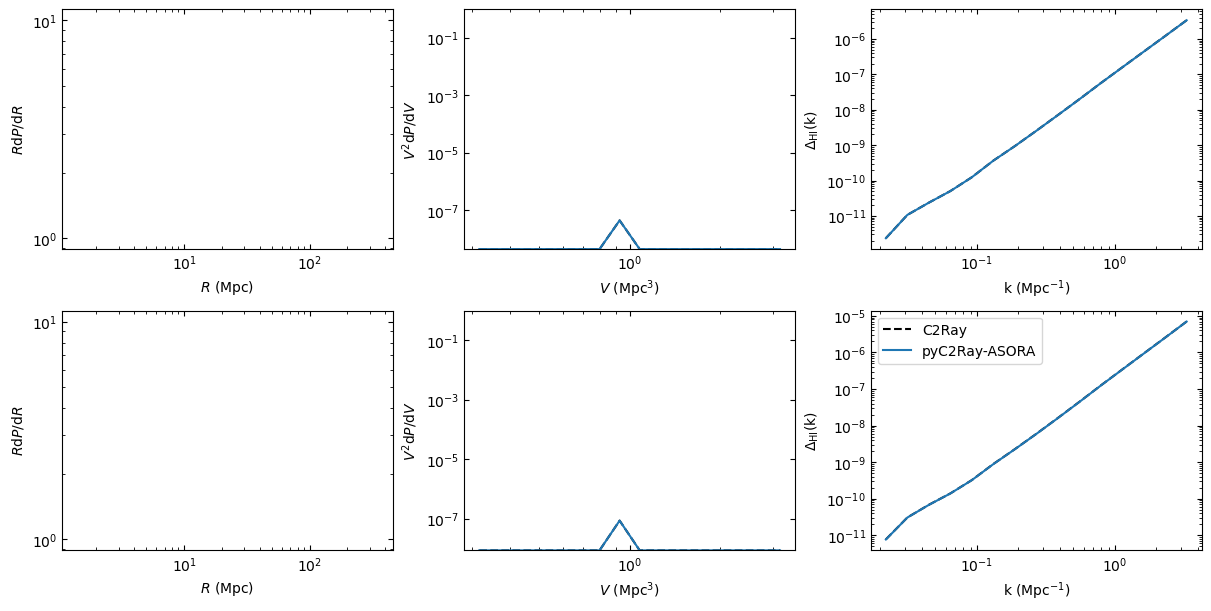

In [52]:
fig, axs = plt.subplots(redshift.size, 3, figsize=(12, 3*redshift.size), constrained_layout=True)

box_dims = 244/0.7

for i, z in enumerate(redshift):
    xHI_old = t2c.XfracFile('%sxfrac3d_%.3f.bin' %(path_old, z)).xi
    xHI_new = t2c.read_cbin('%sxfrac_%.3f.dat' %(path_new, z), bits=64, order='F')

    # BSD
    mask_old = xHI_old>0.5
    r_old, dn_old = t2c.mfp(mask_old, boxsize=box_dims, iterations=100000, verbose=False)
    mask_new = xHI_new>0.5
    r_new, dn_new = t2c.mfp(mask_new, boxsize=box_dims, iterations=100000, verbose=False)

    axs[i,0].loglog(r_old, dn_old, 'k-')
    axs[i,0].loglog(r_new, dn_new, ls='--', color='tab:blue')
    axs[i,0].set_xlabel('$R$ (Mpc)')
    axs[i,0].set_ylabel('$R\mathrm{d}P/\mathrm{d}R$')
    
    # fof
    _, v_old = t2c.fof(mask_old)
    _, v_new = t2c.fof(mask_new)
    fof_old = t2c.plot_fof_sizes(v_old, bins=15, boxsize=box_dims)
    fof_new = t2c.plot_fof_sizes(v_new, bins=15, boxsize=box_dims)
    
    axs[i,1].loglog(fof_old[0], fof_old[1], 'k--')
    axs[i,1].loglog(fof_new[0], fof_new[1], ls='-', color='tab:blue')
    axs[i,1].set_xlabel('$V$ (Mpc$^3$)')
    axs[i,1].set_ylabel('$V^2\mathrm{d}P/\mathrm{d}V$')
    axs[i,1].set_ylim(np.min([fof_new[2], fof_old[2]]), 1)

    # Pk_HI
    ps_old, ks_old = t2c.power_spectrum_1d(xHI_old, kbins=15, box_dims=box_dims)
    ps_new, ks_new = t2c.power_spectrum_1d(xHI_new, kbins=15, box_dims=box_dims)
    axs[i,2].loglog(ks_old, ps_old*ks_old**3/2/np.pi**2, 'k--', label='C2Ray')
    axs[i,2].loglog(ks_new, ps_new*ks_new**3/2/np.pi**2, ls='-', color='tab:blue', label='pyC2Ray-ASORA')
    plt.legend()
    axs[i,2].set_xlabel('k (Mpc$^{-1}$)')
    axs[i,2].set_ylabel(r'$\Delta_{\rm HI}$(k)')

## Compare unit tests for Hackathon

In [48]:
import pickle
from matplotlib.colors import CenteredNorm
path_mpi = '/scratch/snx3000/mibianco/results_c2ray/test_eurohack23/test_mpi/'
path_nompi = '/scratch/snx3000/mibianco/results_c2ray/test_eurohack23/test_nompi/'

19 -1.2212453270876722e-15 5.548174766834002e-21 1.4432899320127035e-15
29 -1.5543122344752192e-15 -2.3164543200282494e-21 1.9984014443252818e-15
39 -2.886579864025407e-15 -2.12995298481955e-20 1.9984014443252818e-15


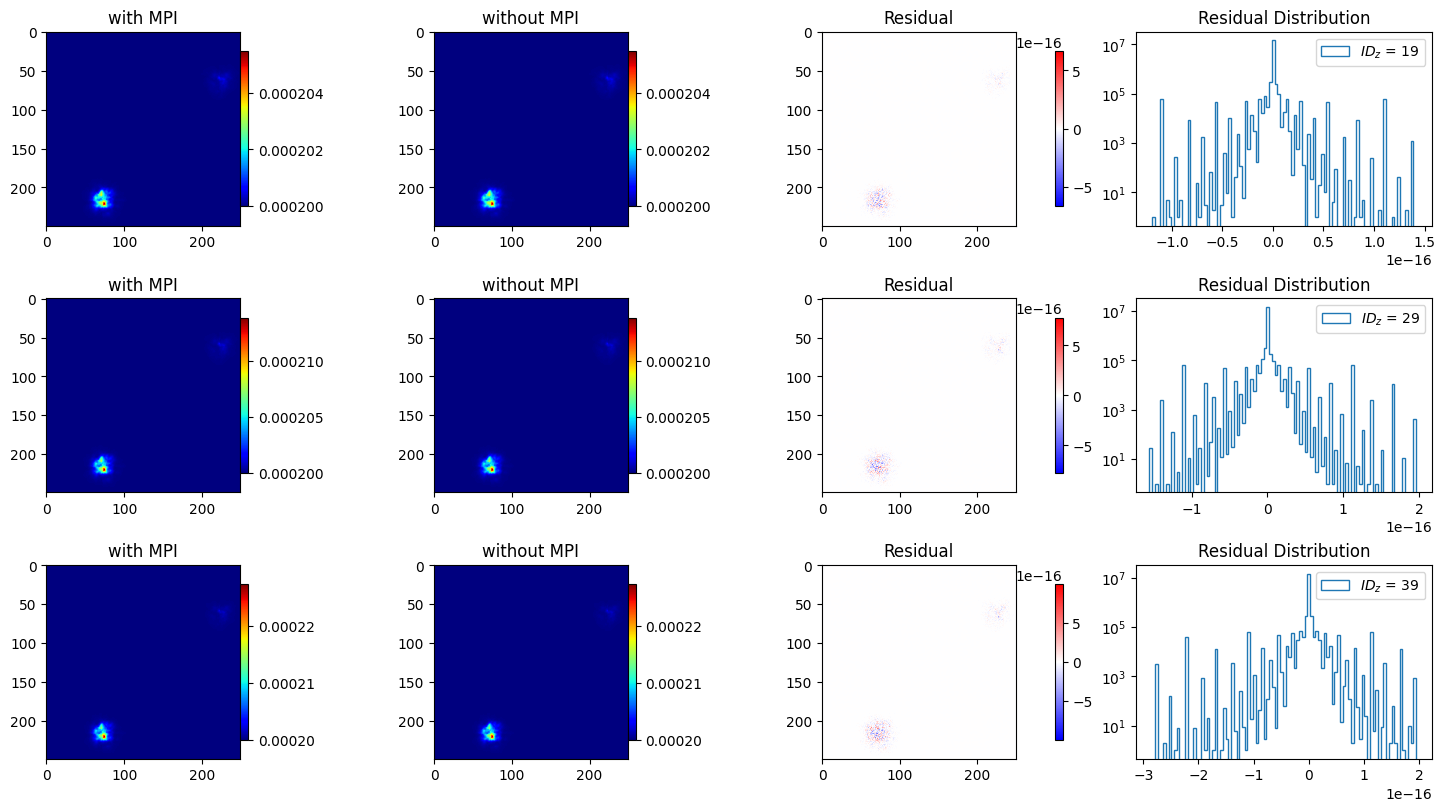

(None, None)

<Figure size 640x480 with 0 Axes>

In [65]:
#id_z = [10, 15, 17]
id_z = [19, 29, 39]
fig, axs = plt.subplots(figsize=(15, 8), ncols=4, nrows=len(id_z), constrained_layout=True)

for j, i in enumerate(id_z):
    d1 = pickle.load(open('%sxfrac_%.3f.pkl' %(path_mpi, i), "rb"))
    d2 = pickle.load(open('%sxfrac_%.3f.pkl' %(path_nompi, i), "rb"))
    #d1 = pickle.load(open('%sIonRates_%.3f.pkl' %(path_mpi, i), "rb"))
    #d2 = pickle.load(open('%sIonRates_%.3f.pkl' %(path_nompi, i), "rb"))
    
    res = d1 - d2
    print(i, res.min(), res.mean(), res.max())
    
    im = axs[j,0].imshow(d1[100], cmap='jet')
    axs[j,0].set_title('with MPI')
    plt.colorbar(im, ax=axs[j,0], pad=0, shrink=0.8)
    im = axs[j,1].imshow(d2[100], cmap='jet')
    axs[j,1].set_title('without MPI')
    plt.colorbar(im, ax=axs[j,1], pad=0, shrink=0.8)
    im = axs[j,2].imshow(res[100], cmap='bwr', norm=CenteredNorm(vcenter=0))
    axs[j,2].set_title('Residual')
    plt.colorbar(im, ax=axs[j,2], pad=0, shrink=0.8)
    axs[j,3].set_title('Residual Distribution')
    axs[j,3].hist(res.flatten(), bins=np.linspace(res.min()/10, res.max()/10, 100), histtype='step', label=r'$ID_z$ = %d' %i)
    axs[j,3].set_yscale('log')
    axs[j,3].legend()
plt.show(), plt.clf()